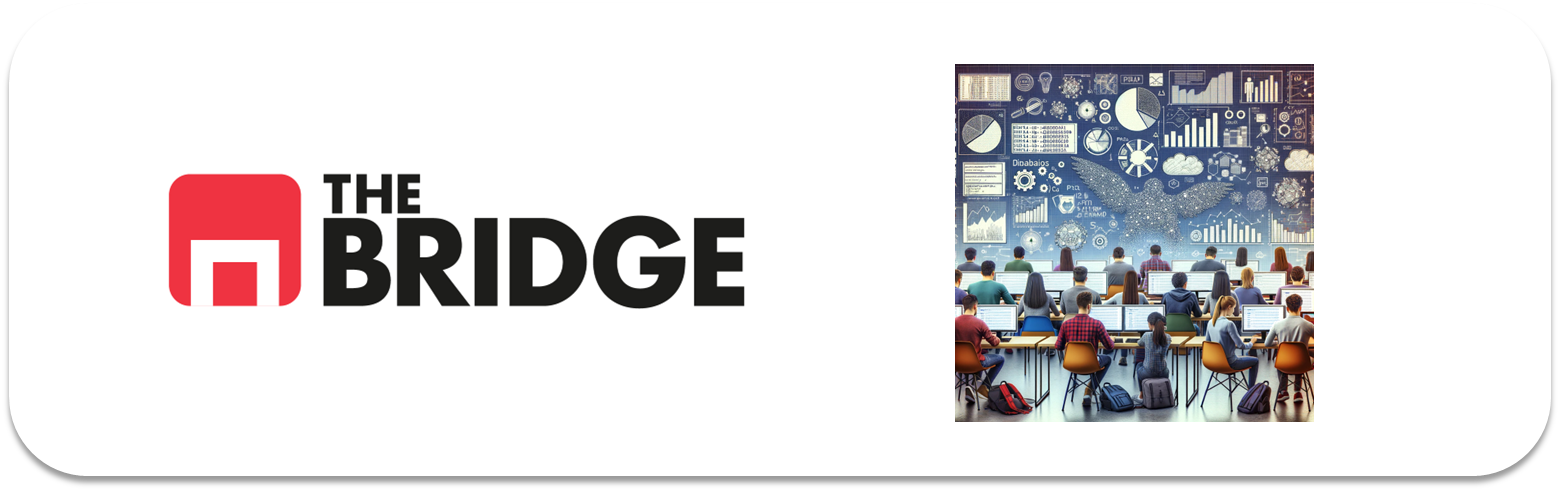

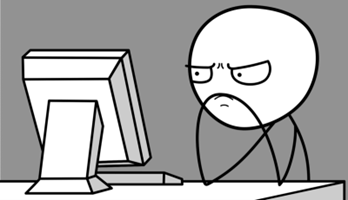

Para ejercitarte y afianzar lo aprendido sobre **Regularización**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)


### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model, metrics, model_selection
from sklearn.linear_model import ElasticNet
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
import seaborn as sns

En estos ejercicios vamos a repasar la regularización sobre regresión lineal obteniendo primero un modelo de regresión lineal para predecir el precio de un coche y luego los equivalentes con penalizaciones L2 (Ridge), L1 (Lasso) y con la combinación de ambas (ElasticNet)

### Ejercicio 1

Carga el dataset de partida ("./data/CarPrice_Assignment.csv") en el que tenemos diferentes modelos de coches con sus características y el precio de estos. Échale un vistazo

In [2]:
df = pd.read_csv("./data/CarPrice_Assignment.csv")

In [3]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### Ejercicio 2

Identifica la variable target y asignala a una variable de nombre `target`, luego elimina de forma permanente el campo "car_ID"

In [5]:
target = df["price"]
df.drop(columns=["car_ID"], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

### Ejercicio 3

Haz un split del dataset en train y test al 80/20 empleando la función de sklearn que ya conoces

In [6]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["price"])
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Ejercicio 4

Aunque vamos a emplear todas las variabes numéricas del dataset como predictores o features, obten la correlación de todas ellas con el target y escoge los que creas que son tus tres mejores predictores. Crea una lista con los nombres de las variables numéricas y llámalo `features_num`

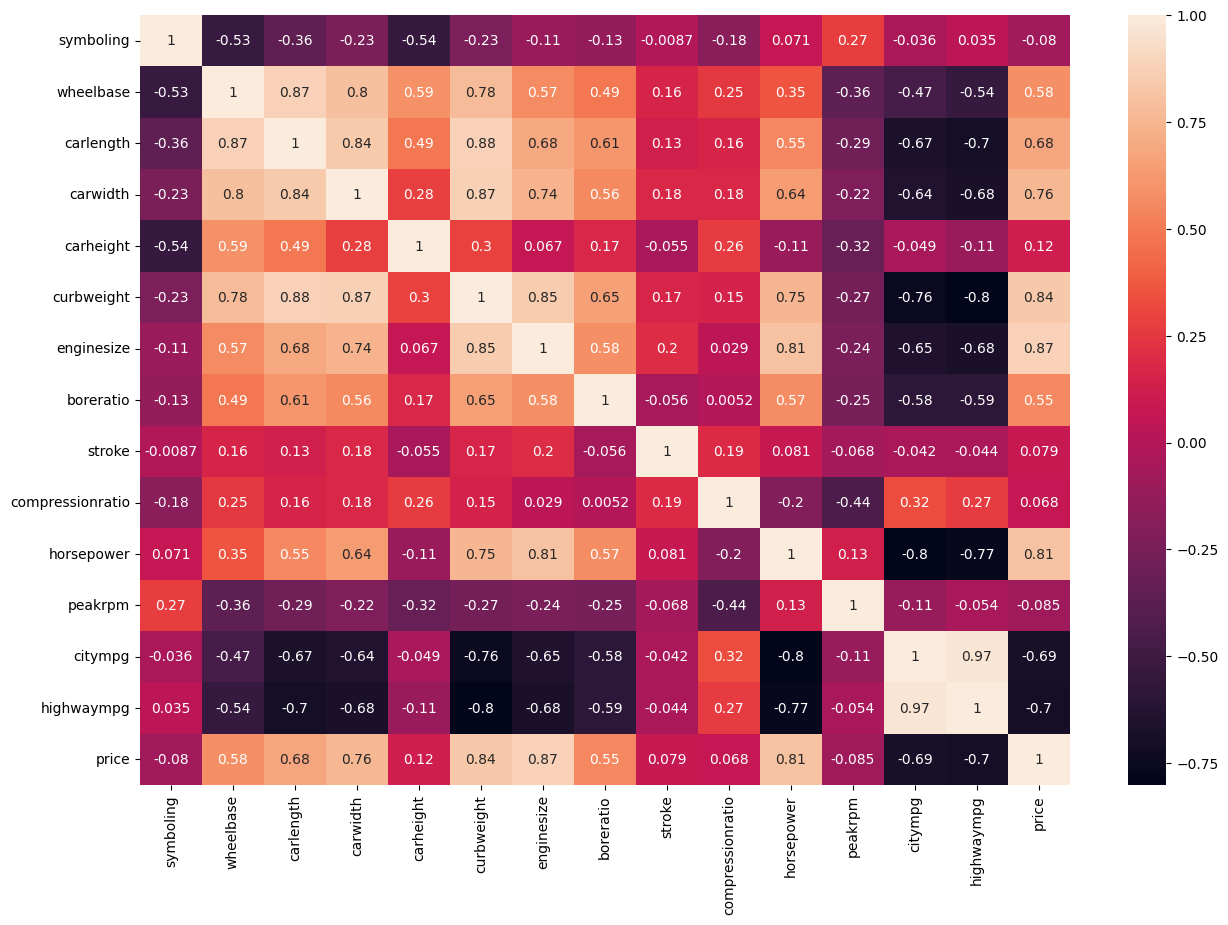

In [7]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only = True),annot=True);
plt.show();

In [8]:
#var_num = df.columns.to_list()
var_num = ['symboling', 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']
#features_num = ['enginesize', 'boreratio', 'highwaympg']
features_num = ['enginesize', 'curbweight', 'horsepower']



### Ejercicio 5

Completa el siguiente código que tiene como objetivo generar un modelo de regresión lineal utilizando todos los valores de las variables (salvo la target):

In [9]:
# Separación x e y
X_train = X_train.drop(columns= ["CarName", "fueltype", "aspiration", "doornumber", "carbody", "drivewheel", "enginelocation", "enginetype", "cylindernumber", "fuelsystem"])
#y_train = ________[target]

X_test = X_test.drop(columns = ["CarName", "fueltype", "aspiration", "doornumber", "carbody", "drivewheel", "enginelocation", "enginetype", "cylindernumber", "fuelsystem"])
#y_test = _________[_______]
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train[features_num]), columns= features_num)
X_test = pd.DataFrame(scaler.transform(X_test[features_num]), columns= features_num)

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)




LinearRegression()

### Ejercicio 6

Obten el MAE,RMSE y $R^2$ para las predicciones sobre train (X_train) y para las predicciones sobre test (X_test). ¿Podemos esperar una buena generalización?

In [10]:
from sklearn import metrics

pred_train = lin_reg.predict(X_train)
print('MAE train', metrics.mean_absolute_error(y_train, pred_train))
print('MSE train', metrics.mean_squared_error(y_train, pred_train))
print('RMSE train', np.sqrt(metrics.mean_squared_error(y_train, pred_train)))
print('R2 train', lin_reg.score(X_train,y_train))

MAE train 2376.532282481262
MSE train 11287354.734383872
RMSE train 3359.6658664789675
R2 train 0.8107350093644984


In [11]:
predictions = lin_reg.predict(X_test)
print('MAE test', metrics.mean_absolute_error(y_test, predictions))
print('MSE test', metrics.mean_squared_error(y_test, predictions))
print('RMSE test', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2 test', lin_reg.score(X_test,y_test))

MAE test 2722.101702438694
MSE test 14145734.532358835
RMSE test 3761.0815641725767
R2 test 0.8208130980062112


### Ejercicio 7
 
Vamos a regularizar, crea un regresor Ridge con alpha inicial a 10 y entrenalo con el X_train. Obten MAE, RMSE y $R^2$ considerando las predicciones sobre el mismo X_train

In [22]:
from sklearn.linear_model import Ridge

ridgeR = Ridge(alpha = 10) # alpha es lambda 
ridgeR.fit(X_train, y_train)

print("Train MSE sin regularización:", round(metrics.mean_squared_error(y_train, lin_reg.predict(X_train)),2))
print("Test MSE sin regularización:", round(metrics.mean_squared_error(y_test, lin_reg.predict(X_test)),2))

print("Train MSE con regularización:", round(metrics.mean_squared_error(y_train, ridgeR.predict(X_train)),2))
print("Test MSE con regularización:", round(metrics.mean_squared_error(y_test, ridgeR.predict(X_test)),2))

Train MSE sin regularización: 11287354.73
Test MSE sin regularización: 14145734.53
Train MSE con regularización: 11319543.84
Test MSE con regularización: 14455875.5


In [23]:
print("Train RMSE sin regularización:", round(np.sqrt(metrics.mean_squared_error(y_train, lin_reg.predict(X_train))),2))
print("Test RMSE sin regularización:", round(np.sqrt(metrics.mean_squared_error(y_test, lin_reg.predict(X_test))),2))

print("Train RMSE con regularización:", round(np.sqrt(metrics.mean_squared_error(y_train, ridgeR.predict(X_train))),2))
print("Test RMSE con regularización:", round(np.sqrt(metrics.mean_squared_error(y_test, ridgeR.predict(X_test))),2))

Train RMSE sin regularización: 3359.67
Test RMSE sin regularización: 3761.08
Train RMSE con regularización: 3364.45
Test RMSE con regularización: 3802.09


In [24]:
print("Train MAE sin regularización:", round(metrics.mean_absolute_error(y_train, lin_reg.predict(X_train)),2))
print("Test MAE sin regularización:", round(metrics.mean_absolute_error(y_test, lin_reg.predict(X_test)),2))

print("Train MAE con regularización:", round(metrics.mean_absolute_error(y_train, ridgeR.predict(X_train)),2))
print("Test MAE con regularización:", round(metrics.mean_absolute_error(y_test, ridgeR.predict(X_test)),2))

Train MAE sin regularización: 2376.53
Test MAE sin regularización: 2722.1
Train MAE con regularización: 2362.01
Test MAE con regularización: 2733.37


In [25]:
print('R2 test', lin_reg.score(X_test,y_test))
print("Train R2 sin regularización:", round(lin_reg.score(X_train,y_train),4))
print("Test R2 sin regularización:", round(lin_reg.score(X_test,y_test),4))

print("Train R2 con regularización:", round(ridgeR.score(X_train, ridgeR.predict(X_train)),4))
print("Test R2 con  regularización:", round(ridgeR.score(X_test, ridgeR.predict(X_test)),4))


R2 test 0.8208130980062112
Train R2 sin regularización: 0.8107
Test R2 sin regularización: 0.8208
Train R2 con regularización: 1.0
Test R2 con  regularización: 1.0


### Ejercicio 8

Evalúalo contra el X_test y obten MAE,RMSE y $R^2$. ¿Es mejor generalizado que la regresión lineal sin regularizar?

### Ejercicio 9
 
Ahora crea un regresor Lasso con alpha inicial a 125 y entrenalo con el X_train. Obten MAE, RMSE y $R^2$ considerando las predicciones sobre el mismo X_train.

In [26]:
from sklearn.linear_model import Lasso

lassoR = Lasso(alpha=125)
lassoR.fit(X_train, y_train)

print("Train MSE sin regularización:", round(metrics.mean_squared_error(y_train, lin_reg.predict(X_train)),2))
print("Test MSE sin regularización:", round(metrics.mean_squared_error(y_test, lin_reg.predict(X_test)),2))

print("Train MSE con regularización:", round(metrics.mean_squared_error(y_train, lassoR.predict(X_train)),2))
print("Test MSE con regularización:", round(metrics.mean_squared_error(y_test, lassoR.predict(X_test)),2))

Train MSE sin regularización: 11287354.73
Test MSE sin regularización: 14145734.53
Train MSE con regularización: 11305650.26
Test MSE con regularización: 14289895.75


In [27]:
print("Train RMSE sin regularización:", round(np.sqrt(metrics.mean_squared_error(y_train, lin_reg.predict(X_train))),2))
print("Test RMSE sin regularización:", round(np.sqrt(metrics.mean_squared_error(y_test, lin_reg.predict(X_test))),2))

print("Train RMSE con regularización:", round(np.sqrt(metrics.mean_squared_error(y_train, lassoR.predict(X_train))),2))
print("Test RMSE con regularización:", round(np.sqrt(metrics.mean_squared_error(y_test, lassoR.predict(X_test))),2))

Train RMSE sin regularización: 3359.67
Test RMSE sin regularización: 3761.08
Train RMSE con regularización: 3362.39
Test RMSE con regularización: 3780.2


In [28]:
print("Train MAE sin regularización:", round(metrics.mean_absolute_error(y_train, lin_reg.predict(X_train)),2))
print("Test MAE sin regularización:", round(metrics.mean_absolute_error(y_test, lin_reg.predict(X_test)),2))

print("Train MAE con regularización:", round(metrics.mean_absolute_error(y_train, lassoR.predict(X_train)),2))
print("Test MAE con regularización:", round(metrics.mean_absolute_error(y_test, lassoR.predict(X_test)),2))

Train MAE sin regularización: 2376.53
Test MAE sin regularización: 2722.1
Train MAE con regularización: 2359.05
Test MAE con regularización: 2708.6


In [29]:
print('R2 test', lin_reg.score(X_test,y_test))
print("Train R2 sin regularización:", round(lin_reg.score(X_train,y_train),4))
print("Test R2 sin regularización:", round(lin_reg.score(X_test,y_test),4))

print("Train R2 con regularización:", round(ridgeR.score(X_train, lassoR.predict(X_train)),4))
print("Test R2 con  regularización:", round(ridgeR.score(X_test, lassoR.predict(X_test)),4))


R2 test 0.8208130980062112
Train R2 sin regularización: 0.8107
Test R2 sin regularización: 0.8208
Train R2 con regularización: 0.9998
Test R2 con  regularización: 0.9998


### Ejercicio 10

Evalúalo contra el X_test y obten MAE,RMSE y $R^2$. ¿Es mejor generalizado que los otros dos modelos?

### Ejercicio 11

Repite los ejercicios 9 y 10 con un regresos ElasticNet con alpha 0.2 y l1_ratio a 0.7. ¿Es mejor generalizando que el resto?

In [31]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha = 0.2, l1_ratio = 0.7)
elastic_net.fit(X_train, y_train)

print("Train MSE sin regularización:", round(metrics.mean_squared_error(y_train, lin_reg.predict(X_train)),2))
print("Test MSE sin regularización:", round(metrics.mean_squared_error(y_test, lin_reg.predict(X_test)),2))

print("Train MSE con regularización: %0.4f" % metrics.mean_squared_error(y_train, elastic_net.predict(X_train)))
print("Test MSE con regularización: %0.4f" % metrics.mean_squared_error(y_test, elastic_net.predict(X_test)))


Train MSE sin regularización: 11287354.73
Test MSE sin regularización: 14145734.53
Train MSE con regularización: 11318644.8211
Test MSE con regularización: 14451079.5148


In [32]:
print("Train RMSE sin regularización:", round(np.sqrt(metrics.mean_squared_error(y_train, lin_reg.predict(X_train))),2))
print("Test RMSE sin regularización:", round(np.sqrt(metrics.mean_squared_error(y_test, lin_reg.predict(X_test))),2))

print("Train RMSE con regularización:", round(np.sqrt(metrics.mean_squared_error(y_train, elastic_net.predict(X_train))),2))
print("Test RMSE con regularización:", round(np.sqrt(metrics.mean_squared_error(y_test, elastic_net.predict(X_test))),2))

Train RMSE sin regularización: 3359.67
Test RMSE sin regularización: 3761.08
Train RMSE con regularización: 3364.32
Test RMSE con regularización: 3801.46


In [33]:
print("Train MAE sin regularización:", round(metrics.mean_absolute_error(y_train, lin_reg.predict(X_train)),2))
print("Test MAE sin regularización:", round(metrics.mean_absolute_error(y_test, lin_reg.predict(X_test)),2))

print("Train MAE con regularización:", round(metrics.mean_absolute_error(y_train, elastic_net.predict(X_train)),2))
print("Test MAE con regularización:", round(metrics.mean_absolute_error(y_test, elastic_net.predict(X_test)),2))

Train MAE sin regularización: 2376.53
Test MAE sin regularización: 2722.1
Train MAE con regularización: 2362.23
Test MAE con regularización: 2733.28


In [34]:
print('R2 test', lin_reg.score(X_test,y_test))
print("Train R2 sin regularización:", round(lin_reg.score(X_train,y_train),4))
print("Test R2 sin regularización:", round(lin_reg.score(X_test,y_test),4))

print("Train R2 con regularización:", round(ridgeR.score(X_train, elastic_net.predict(X_train)),4))
print("Test R2 con  regularización:", round(ridgeR.score(X_test, elastic_net.predict(X_test)),4))


R2 test 0.8208130980062112
Train R2 sin regularización: 0.8107
Test R2 sin regularización: 0.8208
Train R2 con regularización: 1.0
Test R2 con  regularización: 1.0


### Ejercicio 12

¿Qué podrías hacer para mejorar los regresores regularizados?

### EXTRA:

Utiliza la función siguiente para pintar la importancia de los coeficientes en cada uno de los cuatro modelos y observa el efecto de las penalizaciones de cada una de las regularizaciones:

In [16]:
def show_coefs(model, figsize=(10, 5)):
    df_coef = pd.DataFrame(model.coef_, index=model.feature_names_in_, columns=["coefs"])

    fig, ax = plt.subplots(1, 2, figsize=figsize)
    df_coef.plot(kind="barh", ax=ax[0], legend=False)
    df_coef.abs().sort_values(by="coefs").plot(kind="barh", ax=ax[1], legend=False)
    fig.suptitle("Model Coefficients")

    fig.tight_layout()

    return df_coef

,coefs
enginesize,3136.464709
curbweight,2173.550708
horsepower,2160.260373


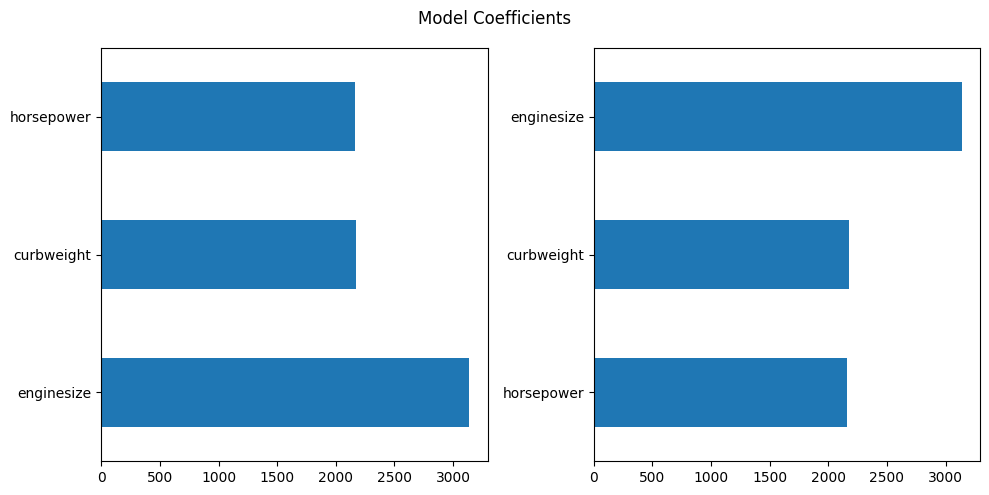

In [35]:
show_coefs(lin_reg)

,coefs
enginesize,2908.502866
curbweight,2213.721798
horsepower,2181.438440


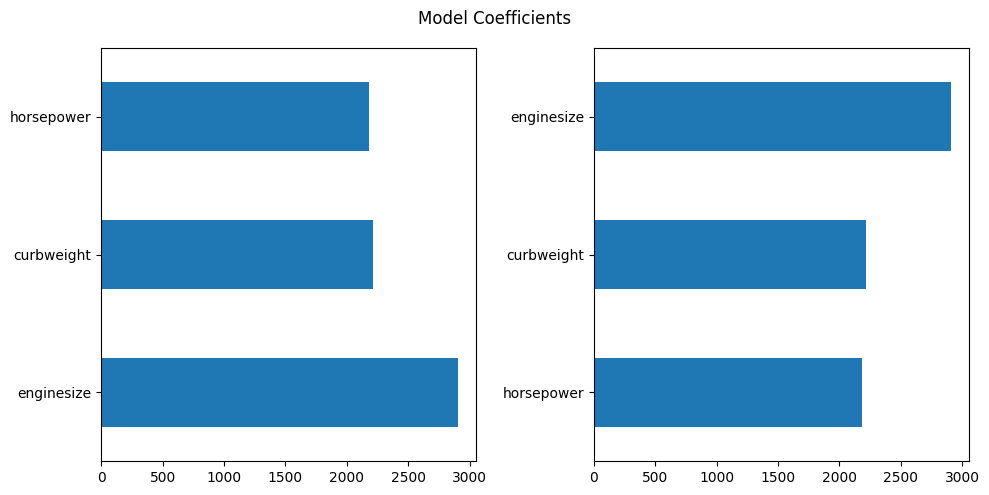

In [36]:
show_coefs(ridgeR)

,coefs
enginesize,3106.748255
curbweight,2116.924059
horsepower,2100.315663


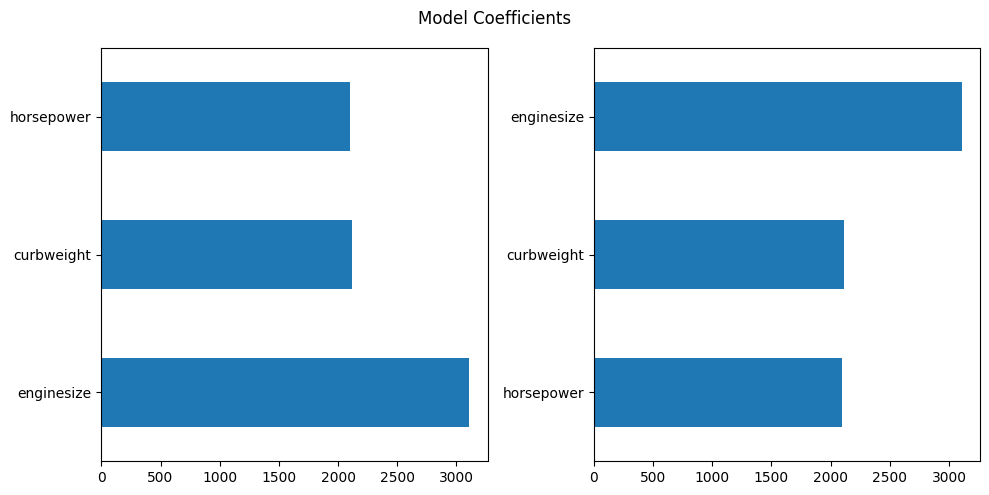

In [37]:
show_coefs(lassoR)

,coefs
enginesize,2911.309837
curbweight,2213.465456
horsepower,2181.359609


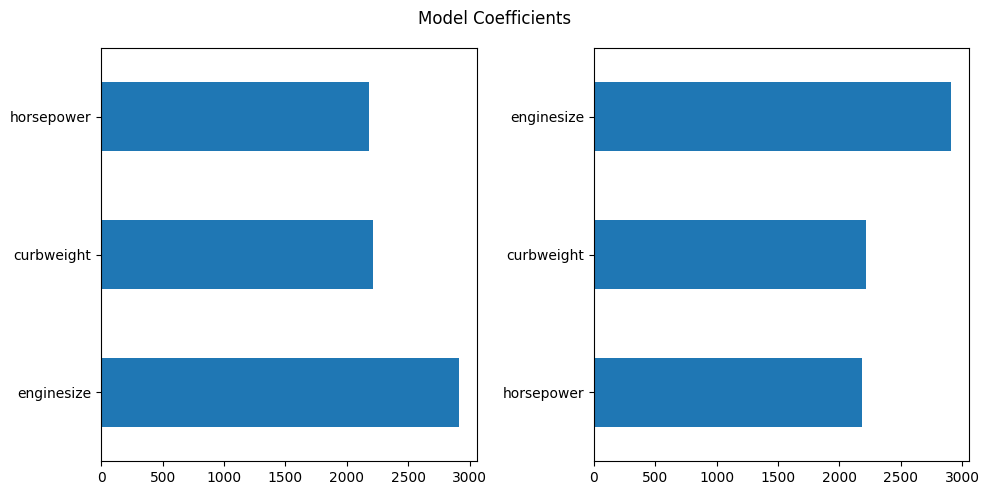

In [38]:
show_coefs(elastic_net)